In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import os
from calculations.calculations import get_company_name
from datetime import timedelta

In [2]:
stock = yf.download('^SPX', period='5d', interval='1h')
data = stock.tz_convert('CET')

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2024-07-15 15:30:00+02:00,5638.160156,5646.740234,5632.640137,5646.240234,5646.240234,0
2024-07-15 16:30:00+02:00,5645.919922,5666.939941,5645.569824,5656.439941,5656.439941,280362962
2024-07-15 17:30:00+02:00,5656.299805,5660.120117,5640.169922,5647.490234,5647.490234,254093821
2024-07-15 18:30:00+02:00,5647.470215,5649.430176,5632.640137,5635.279785,5635.279785,192410149
2024-07-15 19:30:00+02:00,5635.220215,5636.709961,5625.779785,5636.330078,5636.330078,195693197
2024-07-15 20:30:00+02:00,5636.330078,5644.160156,5635.109863,5639.220215,5639.220215,221062207
2024-07-15 21:30:00+02:00,5639.220215,5641.290039,5614.750000,5632.560059,5632.560059,303911225
2024-07-16 15:30:00+02:00,5644.089844,5654.959961,5639.020020,5644.419922,5644.419922,489826896
2024-07-16 16:30:00+02:00,5644.439941,5663.029785,5642.770020,5653.700195,5653.700195,306387082


In [3]:
# Paso 2: Crear un listado completo de fechas
start_date = data.index[0]
print(start_date
end_date = data.index[-1]
all_dates = pd.date_range(start=start_date, end=end_date, freq='1h')

# Paso 3: Identificar las fechas faltantes
missing_dates = all_dates.difference(data.index)

In [19]:
missing_dates[0:2]

DatetimeIndex(['2024-07-15 22:30:00+02:00', '2024-07-15 23:30:00+02:00'], dtype='datetime64[ns, CET]', freq=None)

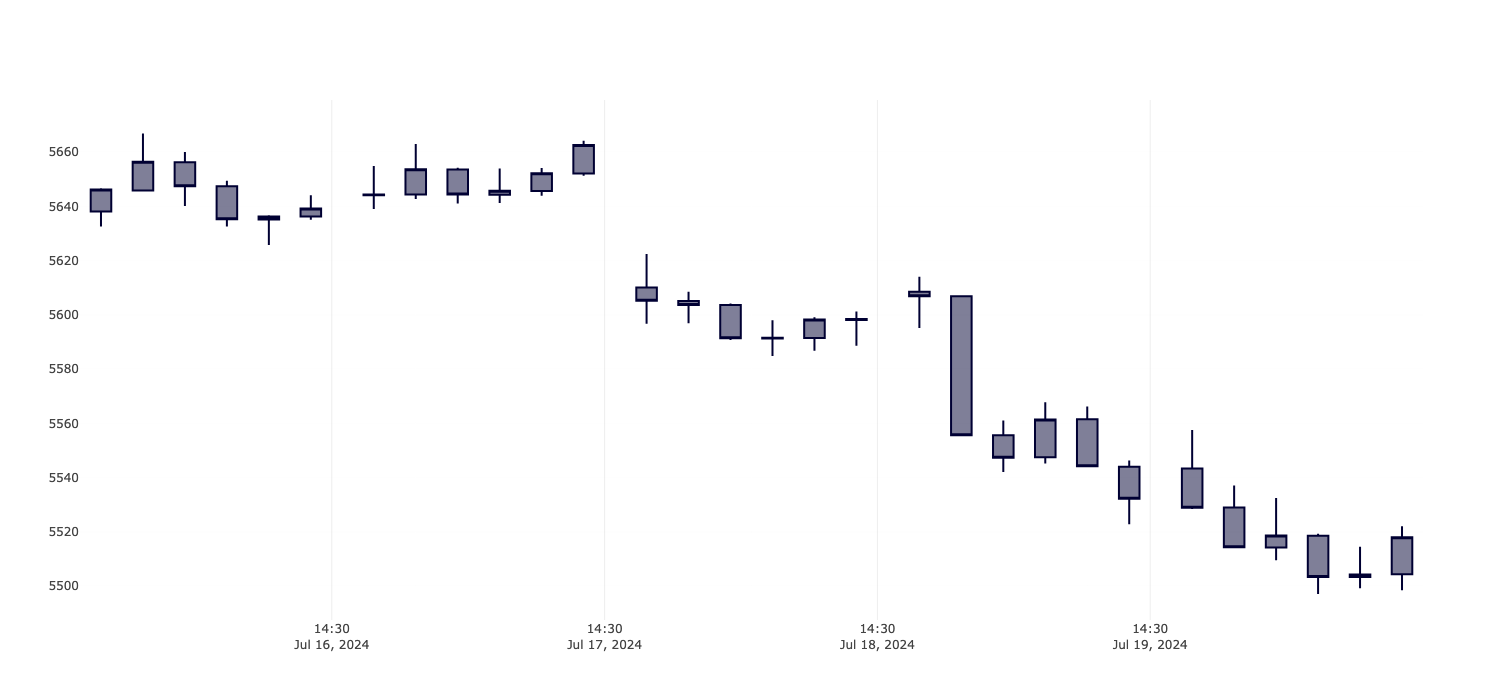

In [26]:
# Paso 4: Crear el gráfico de Plotly
fig = go.Figure(data=[go.Candlestick(
    x=data.index,
    open=data['Open'],
    high=data['High'],
    low=data['Low'],
    close=data['Close']
)])

# Actualizar el eje x para eliminar los gaps de fechas faltantes
fig.update_xaxes(
    rangebreaks=[dict(bounds=["sat", "sun"]),
                dict(bounds=[21, 14.5], pattern="hour")
                ]
)

fig.update_layout(xaxis_title='', yaxis_title='',
                  yaxis=dict(
                            gridcolor='rgba(200, 200, 200, 0.03)',
                            gridwidth=1
                    ),
                  xaxis_rangeslider_visible=False,
                  height=700,
                  dragmode='drawline',
                  shapes=[],
                  newshape=dict(line=dict(color="red")),
                  modebar_add=['drawline','eraseshape'],
                  showlegend=False)

# Mostrar el gráfico
fig.show()

In [7]:
data

,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2024-07-15 15:30:00+02:00,5638.160156,5646.740234,5632.640137,5646.240234,5646.240234,0
2024-07-15 16:30:00+02:00,5645.919922,5666.939941,5645.569824,5656.439941,5656.439941,280362962
2024-07-15 17:30:00+02:00,5656.299805,5660.120117,5640.169922,5647.490234,5647.490234,254093821
2024-07-15 18:30:00+02:00,5647.470215,5649.430176,5632.640137,5635.279785,5635.279785,192410149
2024-07-15 19:30:00+02:00,5635.220215,5636.709961,5625.779785,5636.330078,5636.330078,195693197
2024-07-15 20:30:00+02:00,5636.330078,5644.160156,5635.109863,5639.220215,5639.220215,221062207
2024-07-15 21:30:00+02:00,5639.220215,5641.290039,5614.750000,5632.560059,5632.560059,303911225
2024-07-16 15:30:00+02:00,5644.089844,5654.959961,5639.020020,5644.419922,5644.419922,489826896
2024-07-16 16:30:00+02:00,5644.439941,5663.029785,5642.770020,5653.700195,5653.700195,306387082
